# Задания
1. Реализовать решение задач классификации и регрессии пользовательских и/или модельных данных с использованием бэггинга над деревьями решений и случайного леса.
2. Реализовать решение задач классификации и регрессии пользовательских и/или модельных данных с использованием градиентного бустинга, алгоритмов AdaBoost, XGBoost, CatBoost и LightGBM.
3. Реализовать решение задач классификации и/или регрессии пользовательских и/или модельных данных с использованием стекинга.
4. Реализовать решение задач классификации и/или регрессии пользовательских и/или модельных данных с использованием многоуровнего стекинга.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Классификация. данные №1. Students' Academic Performance Dataset
Набор данных состоит из 480 записей учащихся и 16 характеристик. Характеристики классифицируются по трем основным категориям: (1) Демографические характеристики, такие как пол и национальность. (2) Характеристики академической подготовки, такие как ступень образования, классный уровень и секция. (3) Поведенческие особенности, такие как поднятая рука в классе, открытие ресурсов, ответы на опрос родителей и удовлетворенность школой
- Ссылка на данные - https://clck.ru/36wxxV

#### Загрузка

In [ ]:
df = pd.read_csv('l6.csv')
df.head(2)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M


#### Небольшой обзор данных

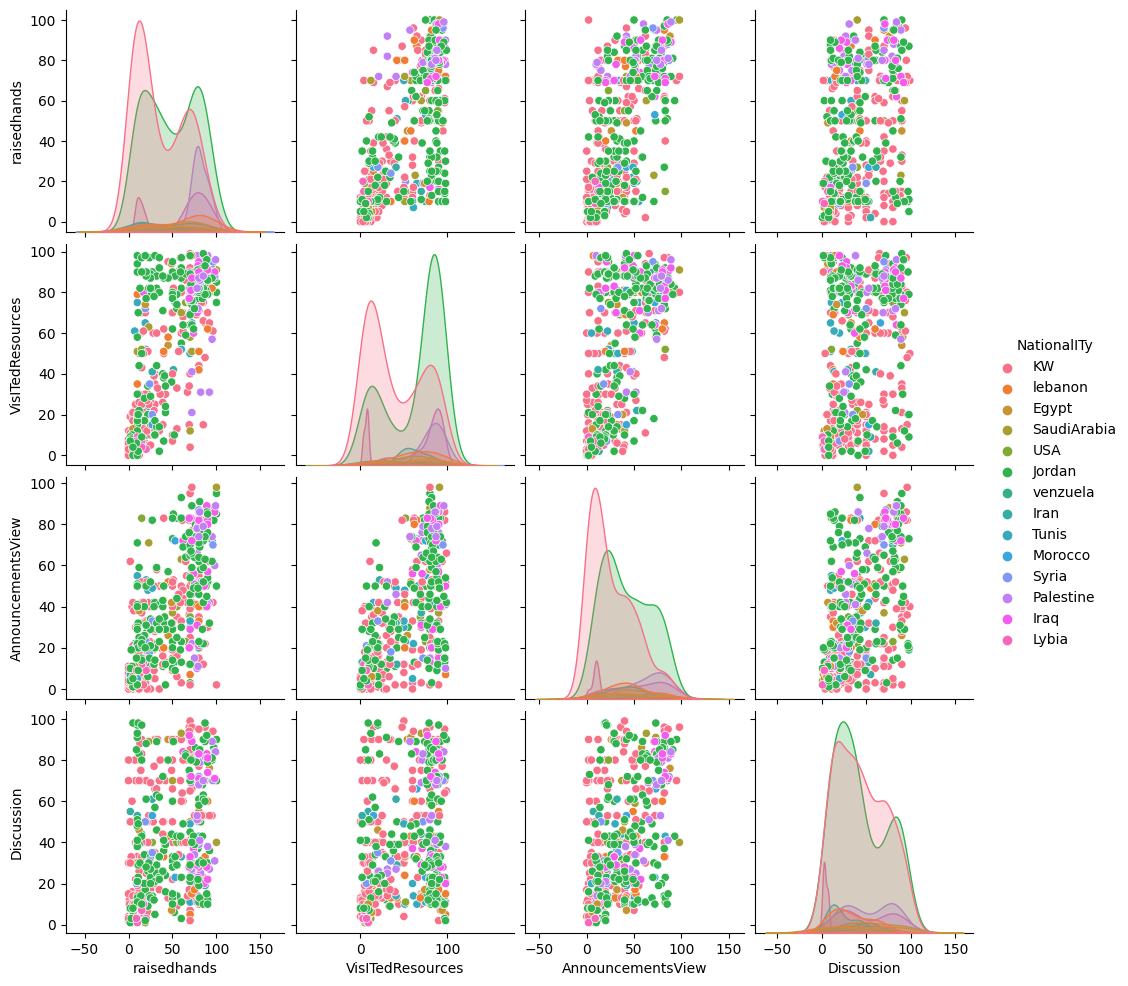

In [ ]:
df_small = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'NationalITy']]
sns.pairplot(df_small, hue='NationalITy')

In [ ]:
df['Class'].head(5)

0    M
1    M
2    L
3    L
4    M
Name: Class, dtype: object

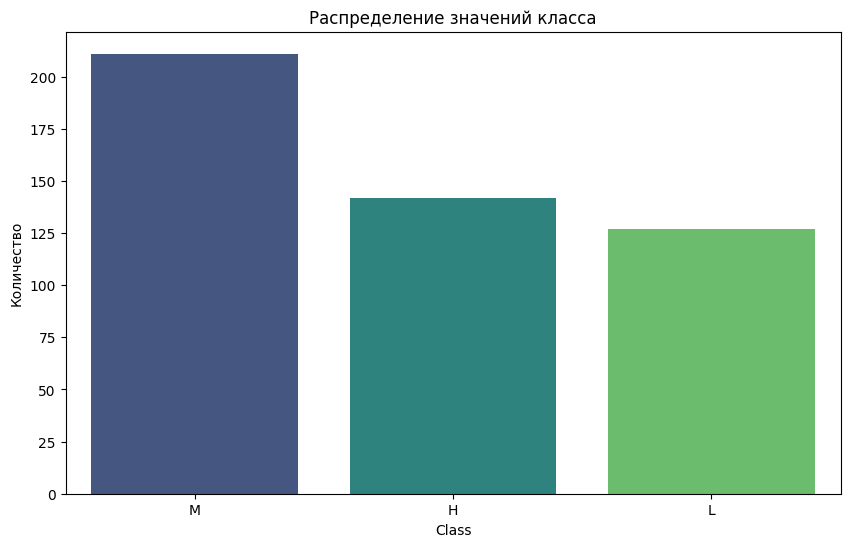

In [ ]:
class_counts = df['Class'].value_counts()

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Распределение значений класса')
plt.xlabel('Class')
plt.ylabel('Количество')
plt.show()

#### Обработка для удобства


In [ ]:
# преобразование категориальных (небинарных) признаков в числовые значения с использованием Label Encoding
from sklearn.preprocessing import LabelEncoder # используется для кодирования категориальных признаков.
Features = df.drop('Class',axis=1) # Создание нового DataFrame (Features), исключая столбец 'Class', который будет целевой переменной
Target = df['Class'] # Создание (целевой переменной) из столбца 'Class'.
label = LabelEncoder() # Создание экземпляра класса LabelEncoder, который будет использоваться для преобразования категориальных значений в числовые.
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index # Выбор всех категориальных признаков, имеющих тип 'object'.
for col in Cat_Colums: # Для каждого категориального признака происходит кодирование с использованием LabelEncoder
    Features[col] = label.fit_transform(Features[col]) # Метод fit_transform обучает LabelEncoder на уникальных значениях признака и затем преобразует эти значения в числовые
# Преобразованные значения заменяют старые значения в DataFrame Features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52) # разделение данных на обучающий и тестовый наборы
# test_size=0.2: Устанавливает размер тестового набора в 20% от общего объема данных.
# random_state=52: Задаем начальное значение для генератора случайных чисел, что обеспечивает воспроизводимость результатов (при повторном запуске кода с тем же random_state получится тот же набор разбиений).
#X_train: Обучающий набор признаков.
#X_test: Тестовый набор признаков.
#y_train: Обучающий набор целевых переменных.
#y_test: Тестовый набор целевых переменных.

In [ ]:
pip install catboost

#### Построение моделей

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# №0. LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)
log_pred = Logit_Model.predict(X_test)
#accur = accuracy_score(y_test,log_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


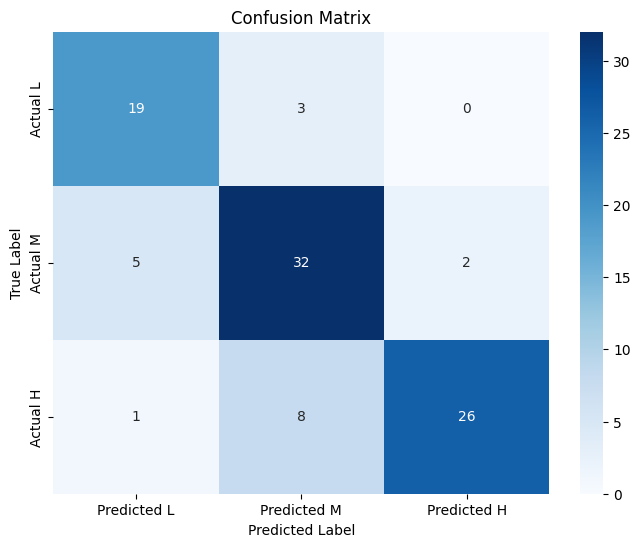

In [ ]:
# Матрица ошибок
conf_mat = confusion_matrix(y_test, log_pred, labels=['L', 'M', 'H'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted L', 'Predicted M', 'Predicted H'], yticklabels=['Actual L', 'Actual M', 'Actual H'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# 1  строка - 19 правильно идентифицированы, как класс L, 3 объекта классифицированы как 'M', хотя фактически они принадлежат к классу 'L'. Ни один объект не был неверно классифицирован как 'H'.
# 2 строка - 5 объектов были неверно классифицированы как 'L'. 32 объекта были правильно классифицированы как 'M'. 2 объекта были неверно классифицированы как 'H'.
# 3 строка - 1 объект был неверно классифицирован как 'L'.  8 объектов были неверно классифицированы как 'M'. 26 объектов были правильно классифицированы как 'H'.

In [ ]:
# №1. Decision Tree + Bagging
#Decision Tree + Bagging означает применение ансамблевого метода бэггинга (Bootstrap Aggregating) к модели Decision Tree (дерево решений).
# Бэггинг — это техника улучшения стабильности и точности модели путем обучения нескольких экземпляров базовой модели на различных подмножествах данных.
DecTree = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(DecTree,random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

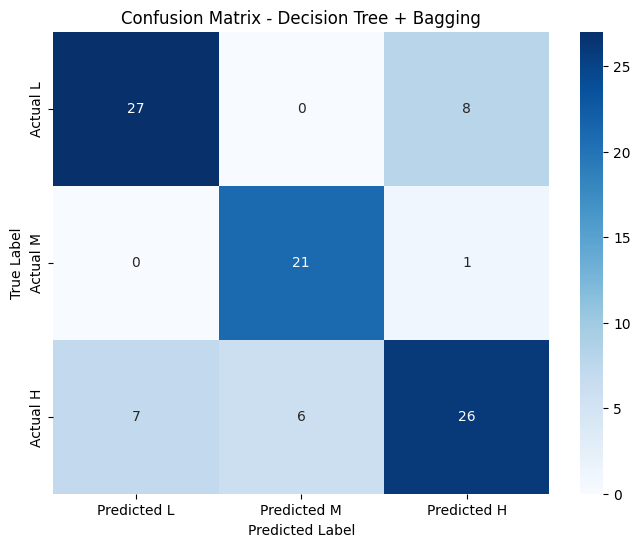

In [ ]:
# Матрица ошибок
conf_mat_bagging = confusion_matrix(y_test, bagging_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted L', 'Predicted M', 'Predicted H'], yticklabels=['Actual L', 'Actual M', 'Actual H'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree + Bagging')
plt.show()
# 1  строка - 27 объектов были правильно классифицированы как 'L', Ни один объект не был неверно классифицирован как 'M, 8 объектов были неверно классифицированы как 'H'.
# 2 строка - Ни один объект не был неверно классифицирован как 'L'. 21 объект был правильно классифицирован как 'M'. 1 объект был неверно классифицирован как 'H'.
# 3 строка - 7 объектов были неверно классифицированы как 'L'. 6 объектов были неверно классифицированы как 'M'. 26 объектов были правильно классифицированы как 'H'.

In [ ]:
# №2. SVC (Для сравнения) svm - метод опорных векторов, находит опорные элементы и меду ними расстояние и делает этот зазор
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)

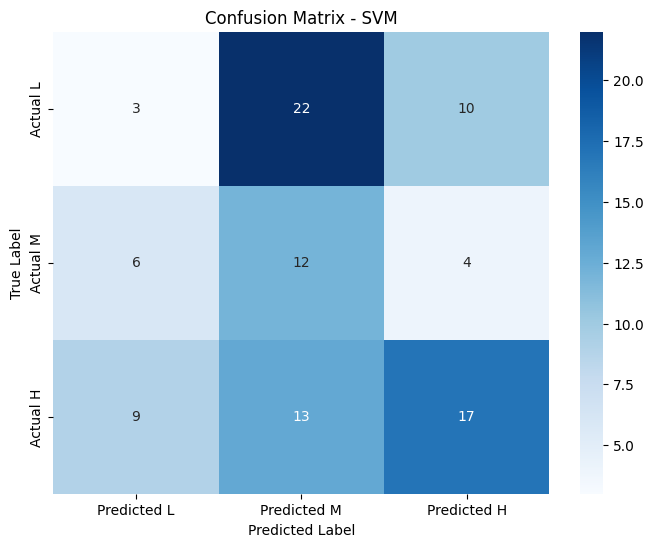

In [ ]:
# Матрица ошибок
conf_mat_svc = confusion_matrix(y_test, svc_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted L', 'Predicted M', 'Predicted H'], yticklabels=['Actual L', 'Actual M', 'Actual H'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()
# 1 строка - 3 объекта были правильно классифицированы как 'L', 22 объекта были неверно классифицированы как 'M', 10 объектов были неверно классифицированы как 'H'.
# 2 строка - 6 объектов были неверно классифицированы как 'L', 12 объектов были правильно классифицированы как 'M', 4 объекта были неверно классифицированы как 'H
# 3 строка - 9 объектов были неверно классифицированы как 'L', 13 объектов были неверно классифицированы как 'M', 17 объектов были правильно классифицированы как 'H'

In [ ]:
# №3. RandomForest выбираются случайные признаки, первые, дальше они обучаются и потом они усредняются
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RF_preds = rf.predict(X_test)

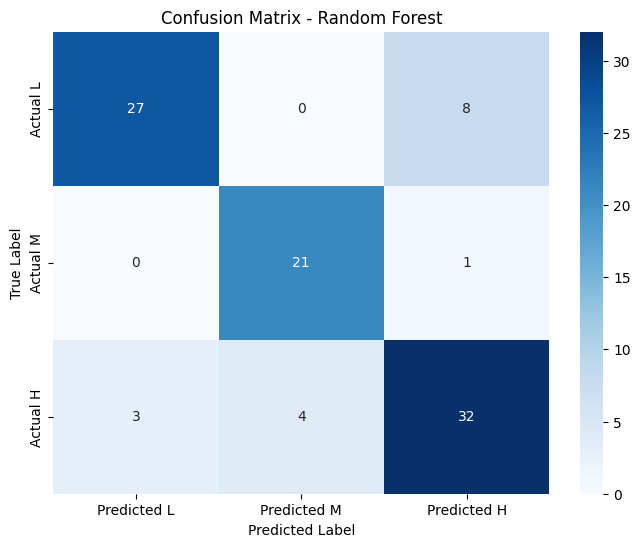

In [ ]:
# Матрица ошибок
conf_mat_rf = confusion_matrix(y_test, RF_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted L', 'Predicted M', 'Predicted H'], yticklabels=['Actual L', 'Actual M', 'Actual H'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()
# 1 строка - 27 объектов были правильно классифицированы как 'L', Ни один объект не был неверно классифицирован как 'M', 8 объектов были неверно классифицированы как 'H'.
# 2 строка - Ни один объект не был неверно классифицирован как 'L', 21 объект был правильно классифицирован как 'M',1 объект был неверно классифицирован как 'H'.
# 3 строка - 1 объект был неверно классифицирован как 'L',3 объекта были неверно классифицированы как 'M', 35 объектов были правильно классифицированы как 'H'.

In [ ]:
# №4. Бустинги (Без подбора гиперпараметров)
#CatBoost строится дерево, потом оно оучается, дает на выходе что-то, потом обучается некст дерево на ошибок  1 дерева, вычисляется ошибка и вычисляется разница от первого и второго
# и по иттерации следующее дерево строится на ошибках
Cat = CatBoostClassifier(verbose = False)
Cat.fit(X_train, y_train)
cat_preds = Cat.predict(X_test)

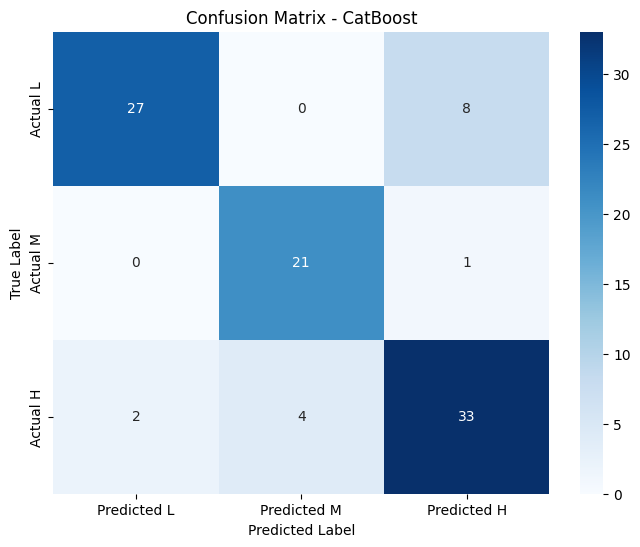

In [ ]:
# Матрица ошибок
conf_mat_cat = confusion_matrix(y_test, cat_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_cat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted L', 'Predicted M', 'Predicted H'], yticklabels=['Actual L', 'Actual M', 'Actual H'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CatBoost')
plt.show()
# 1 строка - 27 объектов были правильно классифицированы как 'L',Ни один объект не был неверно классифицирован как 'M',8 объектов были неверно классифицированы как 'H'.
# 2 строка - Ни один объект не был неверно классифицирован как 'L',21 объект был правильно классифицирован как 'M',1 объект был неверно классифицирован как 'H'.
# 3 строка -2 объекта были неверно классифицированы как 'L',4 объекта были неверно классифицированы как 'M',33 объекта были правильно классифицированы как 'H'.

In [ ]:
# Обычный градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)
gr_preds = gr.predict(X_test)

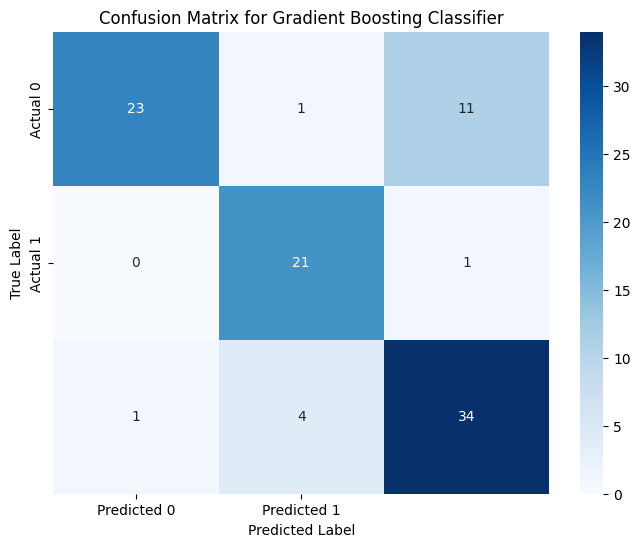

In [ ]:
# Создаем матрицу ошибок для Gradient Boosting Classifier
gr_conf_mat = confusion_matrix(y_test, gr_preds)

# Строим тепловую карту для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(gr_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [ ]:
# LGBM категориальная поддержка
LGBM = LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=4, min_child_weight = 0.01, learning_rate=0.01, verbose = -1)
LGBM.fit(X_train, y_train)
LGBM_preds = LGBM.predict(X_test)

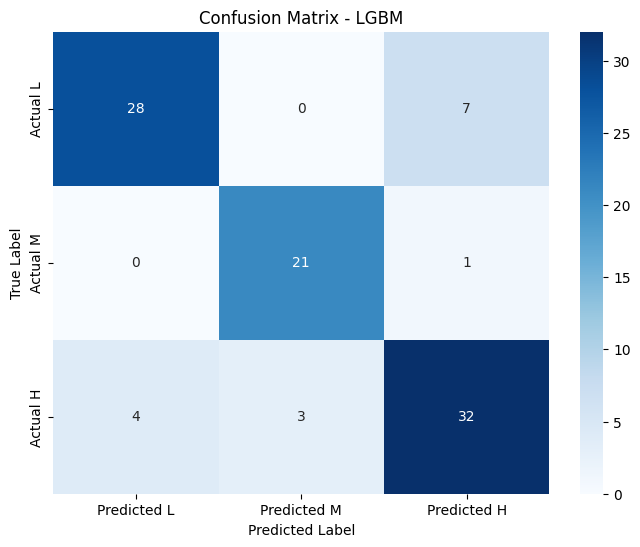

In [ ]:
# Матрица ошибок
conf_mat_lgbm = confusion_matrix(y_test, LGBM_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted L', 'Predicted M', 'Predicted H'], yticklabels=['Actual L', 'Actual M', 'Actual H'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LGBM')
plt.show()
# 1 строка - 28 объектов были правильно классифицированы как 'L',Ни один объект не был неверно классифицирован как 'M',7 объектов были неверно классифицированы как 'H'.
# 2 строка - Ни один объект не был неверно классифицирован как 'L',21 объект был правильно классифицирован как 'M',1 объект был неверно классифицирован как 'H'.
# 3 строка - 4 объекта были неверно классифицированы как 'L',3 объекта были неверно классифицированы как 'M',32 объекта были правильно классифицированы как 'H'

In [ ]:
# XGBOOST улучшили функцию потерь

In [ ]:
import xgboost as xgb

In [ ]:
encoder = LabelEncoder()
new_y_train = encoder.fit_transform(y_train)
new_y_test = encoder.fit_transform(y_test)

In [ ]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, new_y_train).predict(X_test)

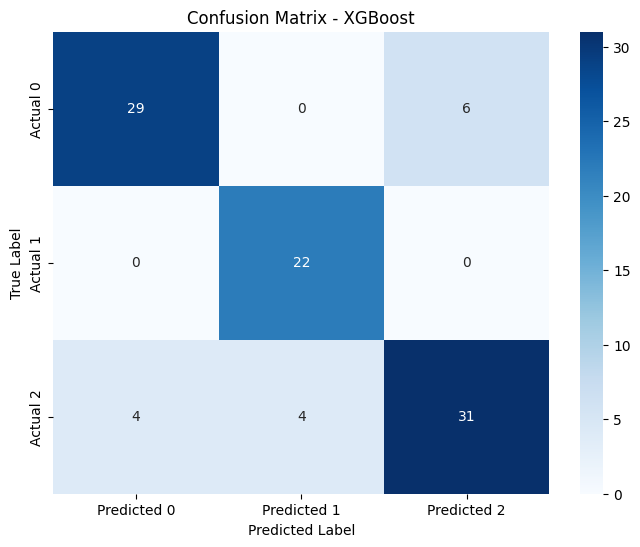

In [ ]:
# матрица ошибок
conf_mat_xgb = confusion_matrix(new_y_test, xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()
# 1 строка - 29 объектов были правильно классифицированы как 'L',Ни один объект не был неверно классифицирован как 'M',6 объектов были неверно классифицированы как 'H'.
# 2 строка - Ни один объект не был неверно классифицирован как 'L',22 объекта были правильно классифицирован как 'M', Ни один объект не был неверно классифицирован как 'H'.
# 3 строка - 4 объектов были неверно классифицированы как 'L', 4 объека были неверно классифицированы как 'M', 31 объектов были верно классифицированы как 'H'.

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=150, learning_rate=0.3, random_state=42)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

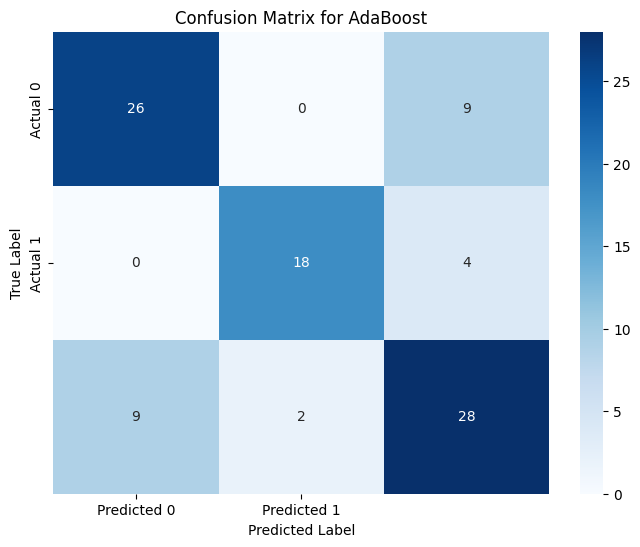

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем матрицу ошибок для AdaBoost
ada_conf_mat = confusion_matrix(y_test, ada_preds)

# Строим тепловую карту для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(ada_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# №5. Стекинг выбираются усредненные значения
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
m1 = RandomForestClassifier()
m2 = SVC(kernel='linear')
estimators = [('RandomForest', m1), ('svm', m2)]
ensemble = VotingClassifier(estimators)
ensemble_model = ensemble.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

In [ ]:
ensemble

VotingClassifier(estimators=[('RandomForest', RandomForestClassifier()),
                             ('svm', SVC(kernel='linear'))])

In [ ]:
# №6. Многоуровневый стекинг (С логистической регрессией на выходе) для 2 уровня признаками слуат усре
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf' , RandomForestClassifier(n_estimators=10 , random_state=42)),
    ('lgbm' ,LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=6, verbose = -1)),
    ('adaboost', AdaBoostClassifier(n_estimators=300))
]
clf = StackingClassifier(
    estimators = estimators ,
    final_estimator = LogisticRegression() ,
    cv = 10
)
clf.fit(X_train , y_train)
stacking_pred = clf.predict(X_test)

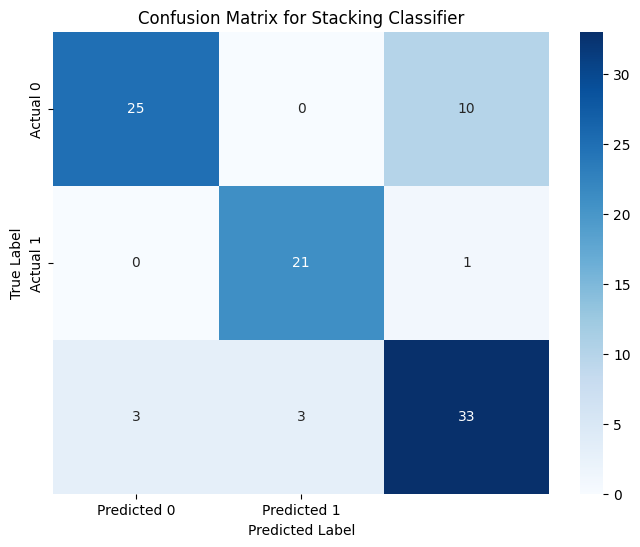

In [ ]:
# Создаем матрицу ошибок для Stacking Classifier
stacking_conf_mat = confusion_matrix(y_test, stacking_pred)

# Строим тепловую карту для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(stacking_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()

In [ ]:
print(f'LogisticRegression: {accuracy_score(y_test, log_pred)}')
print(f'Decision Tree + Bagging: {accuracy_score(y_test, bagging_pred)}')
print(f'SVM (Для сравнения): {accuracy_score(y_test, svc_preds)}')
print(f'RandomForest: {accuracy_score(y_test, RF_preds)}')
print(f'LGBM: {accuracy_score(y_test, LGBM_preds)}')
print(f'XGBOOST: {accuracy_score(new_y_test, xgb_pred)}')
print(f'CatBoost: {accuracy_score(y_test, cat_preds)}')
print(f'AdaBoost:{accuracy_score(y_test, ada_preds)}')
print(f'Ensemble:{accuracy_score(y_test, ensemble_pred)}')
print(f'Stacking : {accuracy_score(y_test, stacking_pred)}')
print(f'Gradient Boosting:{accuracy_score(y_test, gr_preds)}')

LogisticRegression: 0.8020833333333334
Decision Tree + Bagging: 0.7708333333333334
SVM (Для сравнения): 0.3333333333333333
RandomForest: 0.8333333333333334
LGBM: 0.84375
XGBOOST: 0.8541666666666666
CatBoost: 0.84375
AdaBoost:0.75
Ensemble:0.8541666666666666
Stacking : 0.8229166666666666
Gradient Boosting:0.8125


### Посмотрим, как это выглядит визуально:

In [ ]:
log = pd.Series(accuracy_score(y_test, log_pred))
dec = pd.Series(accuracy_score(y_test, bagging_pred))
sv = pd.Series(accuracy_score(y_test, svc_preds))
rf = pd.Series(accuracy_score(y_test, RF_preds))
lg = pd.Series(accuracy_score(y_test, LGBM_preds))
xg = pd.Series(accuracy_score(new_y_test, xgb_pred))
cb = pd.Series(accuracy_score(y_test, cat_preds))
ens = pd.Series(accuracy_score(y_test, ensemble_pred))
stck = pd.Series(accuracy_score(y_test, stacking_pred))

In [ ]:
scores = pd.DataFrame()
scores['Logistic regression'] = log
scores['DecisionTree'] = dec
scores['SVM'] = sv
scores['RandomForest'] = rf
scores['LGBM'] = lg
scores['XGBOOST'] = xg
scores['CatBoost'] = cb
scores['Ensemble'] = ens
scores['StackingLogReg'] = stck

Text(0, 0.5, 'Accuracy Score')

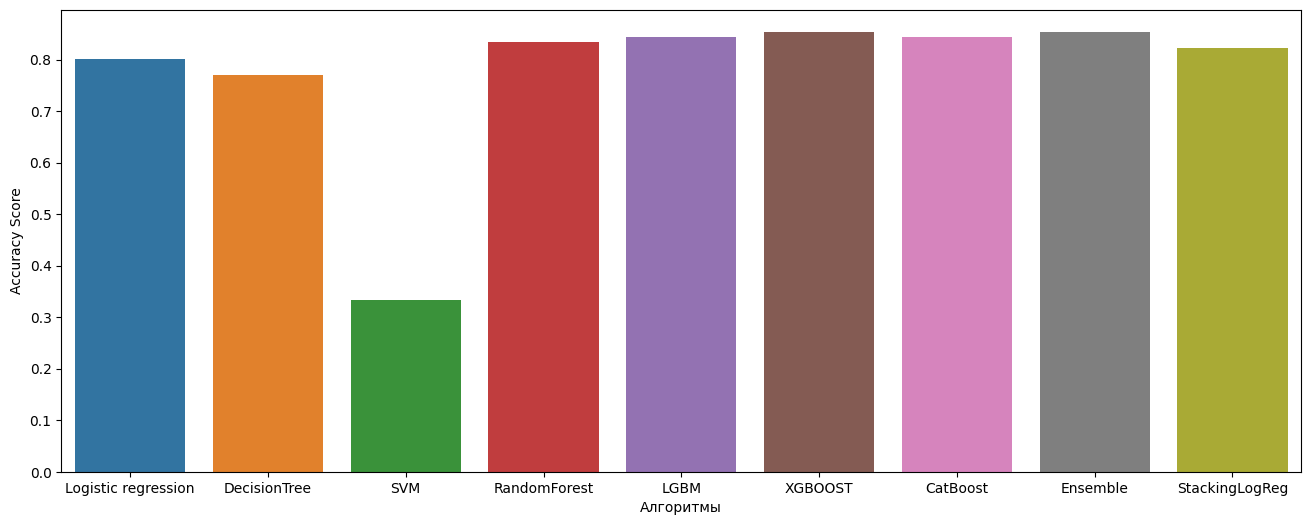

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(scores)

plt.xlabel('Алгоритмы')
plt.ylabel('Accuracy Score')

## Проверю на собственном датасете

In [ ]:
df = pd.read_csv('cwurData.csv')
df.head(2)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012


### Проверим по странам

In [ ]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Выбираем параметры для классификации
X = df[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents',]]
# Удаление строк с пропущенными значениями
X = X.dropna()
y = df.loc[X.index, 'country']  # Обновите y соответственно


# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Создаем и обучаем модель логистической регрессии
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
log_pred = Logit_Model.predict(X_test)

# Рассчитываем точность модели
accuracy = accuracy_score(y_test, log_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.335


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


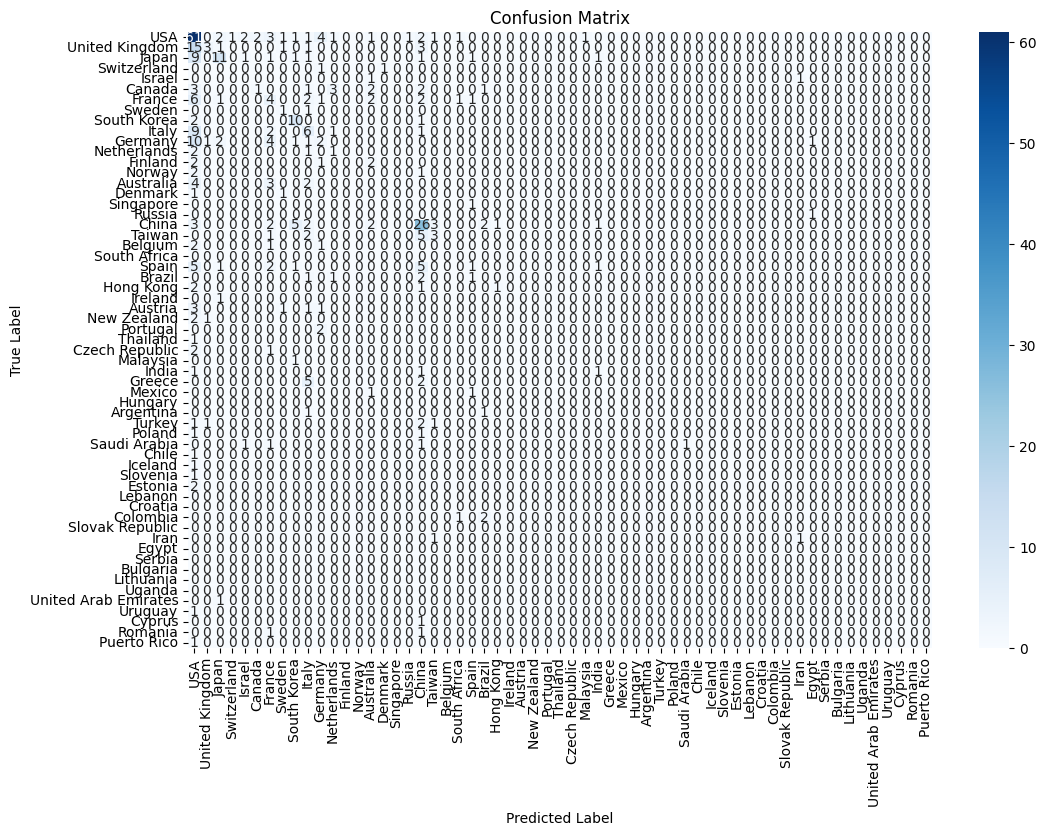

In [ ]:
# Импорт необходимых библиотек
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок
conf_mat = confusion_matrix(y_test, log_pred, labels=df['country'].unique())

# Визуализация матрицы ошибок
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['country'].unique(), yticklabels=df['country'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем и обучаем Bagging Classifier с Decision Tree
DecTree = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(DecTree, random_state=42)
bagging_model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
bagging_pred = bagging_model.predict(X_test)

# Рассчитываем точность модели
accuracy_bagging = accuracy_score(y_test, bagging_pred)
print(f'Bagging Classifier Accuracy: {accuracy_bagging}')

Bagging Classifier Accuracy: 0.4325


In [ ]:
from sklearn.svm import SVC

# Создаем и обучаем SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе для SVC
svc_preds = svc.predict(X_test)

# Рассчитываем точность модели для SVC
accuracy_svc = accuracy_score(y_test, svc_preds)
print(f'SVC Accuracy: {accuracy_svc}')

SVC Accuracy: 0.1825


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем и обучаем RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе для RandomForestClassifier
RF_preds = rf.predict(X_test)

# Рассчитываем точность модели для RandomForestClassifier
accuracy_rf = accuracy_score(y_test, RF_preds)
print(f'RandomForestClassifier Accuracy: {accuracy_rf}')

RandomForestClassifier Accuracy: 0.4975


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CatBoost Classifier
Cat = CatBoostClassifier(verbose=False)
Cat.fit(X_train, y_train)
cat_preds = Cat.predict(X_test)

# Рассчитываем точность модели для CatBoost Classifier
accuracy_cat = accuracy_score(y_test, cat_preds)
print(f'CatBoost Classifier Accuracy: {accuracy_cat}')

CatBoost Classifier Accuracy: 0.46


In [ ]:
# Обычный градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)
gr_preds = gr.predict(X_test)

gr_accuracy = accuracy_score(y_test, gr_preds)
print(f'Gradient Boosting Classifier Accuracy: {gr_accuracy}')

In [ ]:
# LGBM Classifier
LGBM = LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=4, min_child_weight=0.01, learning_rate=0.01, verbose=-1)
LGBM.fit(X_train, y_train)
LGBM_preds = LGBM.predict(X_test)

# Рассчитываем точность модели для LGBM Classifier
accuracy_lgbm = accuracy_score(y_test, LGBM_preds)
print(f'LGBM Classifier Accuracy: {accuracy_lgbm}')

LGBM Classifier Accuracy: 0.3475


In [ ]:
# XGB Classifier
encoder = LabelEncoder()
new_y_train = encoder.fit_transform(y_train)
new_y_test = encoder.fit_transform(y_test)

xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, seed=10)
xgb_pred = xgb.fit(X_train, new_y_train).predict(X_test)

# Рассчитываем точность модели для XGB Classifier
accuracy_xgb = accuracy_score(new_y_test, xgb_pred)
print(f'XGB Classifier Accuracy: {accuracy_xgb}')

XGB Classifier Accuracy: 0.015


In [ ]:
# Многоуровневый стекинг (С логистической регрессией на выходе)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf' , RandomForestClassifier(n_estimators=10 , random_state=42)),
    ('lgbm' ,LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=6, verbose = -1)),
    ('adaboost', AdaBoostClassifier(n_estimators=300))
]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=10
)
clf.fit(X_train, y_train)
stacking_pred = clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Classifier Accuracy: {stacking_accuracy}')

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# RandomForestClassifier
m1 = RandomForestClassifier()

# SVM with linear kernel
m2 = SVC(kernel='linear')

# Список моделей для ансамбля
estimators = [('RandomForest', m1), ('SVM', m2)]

# Создание ансамбля
ensemble = VotingClassifier(estimators)
ensemble_model = ensemble.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

# Рассчитываем точность модели для ансамбля
accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
print(f'Ensemble Accuracy: {accuracy_ensemble}')

Ensemble Accuracy: 0.4675


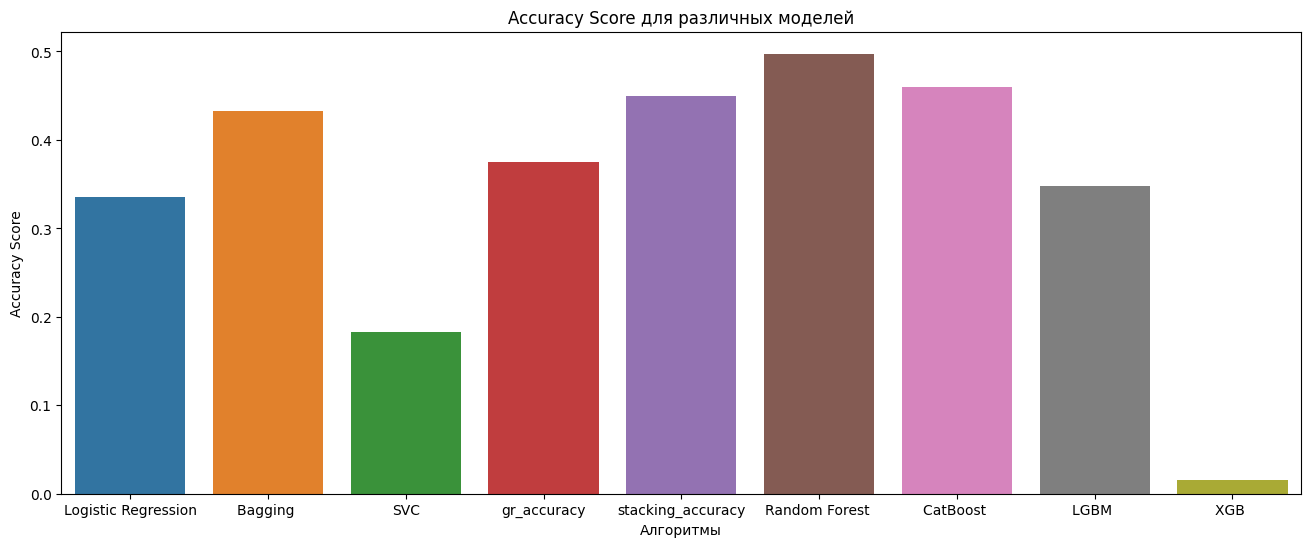

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Вычисляем accuracy_score для каждой модели
accuracy = accuracy_score(y_test, log_pred)
accuracy_bagging = accuracy_score(y_test, bagging_pred)
accuracy_svc = accuracy_score(y_test, svc_preds)
accuracy_rf = accuracy_score(y_test, RF_preds)
accuracy_cat = accuracy_score(y_test, cat_preds)
accuracy_lgbm = accuracy_score(y_test, LGBM_preds)
accuracy_xgb = accuracy_score(new_y_test, xgb_pred)
gr_accuracy = accuracy_score(y_test, gr_preds)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
#accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
#'Ensemble': accuracy_ensemble
# Создаем словарь с результатами
accuracy_dict = {
    'Logistic Regression': accuracy,
    'Bagging ': accuracy_bagging,
    'SVC': accuracy_svc,
    'gr_accuracy': gr_accuracy,
    'stacking_accuracy': stacking_accuracy,
    'Random Forest ': accuracy_rf,
    'CatBoost ': accuracy_cat,
    'LGBM ': accuracy_lgbm,
    'XGB ': accuracy_xgb

}

# Строим график
plt.figure(figsize=(16, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.xlabel('Алгоритмы')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score для различных моделей')
plt.show()

### Введем бинарную переменную и проверим по ней

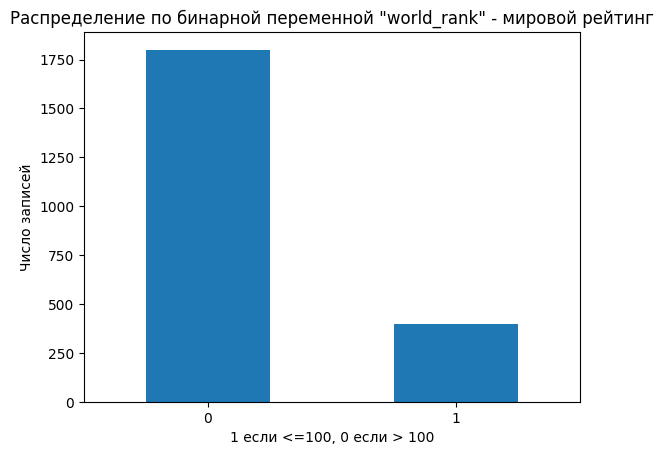

In [ ]:
data = pd.read_csv("cwurData.csv")
# бинаризация: создание бинарной переменной на основе условия
data['is_top_ranked'] = (data['world_rank'] <= 100).astype(int)
data['is_top_ranked'].value_counts().plot(kind='bar')
plt.title('Распределение по бинарной переменной "world_rank" - мировой рейтинг')
plt.xlabel('1 если <=100, 0 если > 100')
plt.ylabel('Число записей')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Выбираем параметры для классификации
X = df[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents','is_top_ranked']]
# Удаление строк с пропущенными значениями
X = X.dropna()
y = df.loc[X.index, 'is_top_ranked']  # Обновите y соответственно


# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Создаем и обучаем модель логистической регрессии
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
log_pred = Logit_Model.predict(X_test)

# Рассчитываем точность модели
accuracy = accuracy_score(y_test, log_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


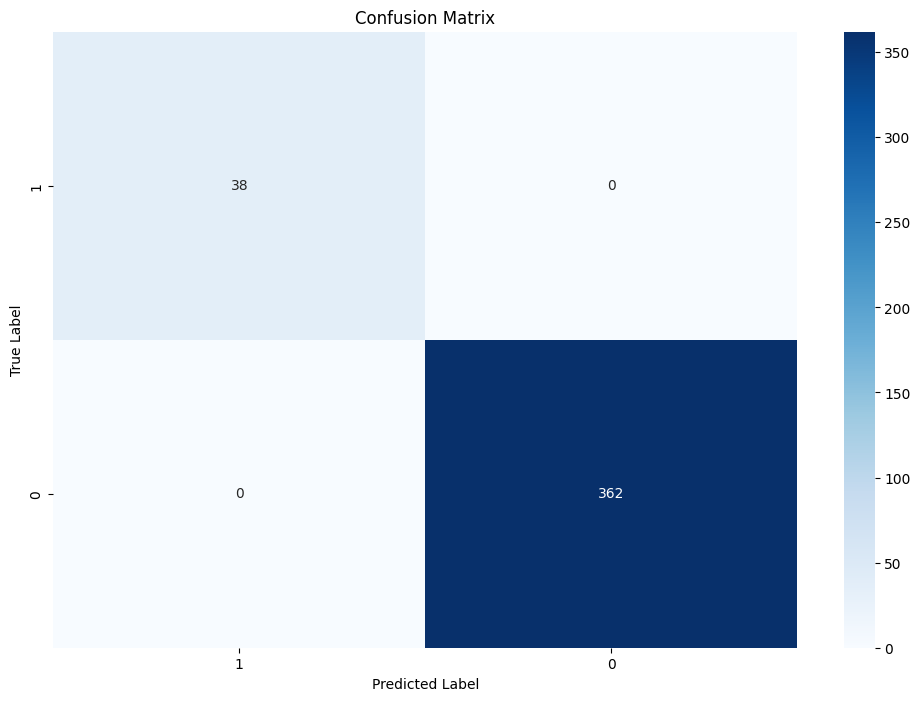

In [ ]:
# Импорт необходимых библиотек
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица ошибок
conf_mat = confusion_matrix(y_test, log_pred, labels=df['is_top_ranked'].unique())

# Визуализация матрицы ошибок
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=df['is_top_ranked'].unique(), yticklabels=df['is_top_ranked'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем и обучаем Bagging Classifier с Decision Tree
DecTree = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(DecTree, random_state=42)
bagging_model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
bagging_pred = bagging_model.predict(X_test)

# Рассчитываем точность модели
accuracy_bagging = accuracy_score(y_test, bagging_pred)
print(f'Bagging Classifier Accuracy: {accuracy_bagging}')

Bagging Classifier Accuracy: 1.0


In [ ]:
from sklearn.svm import SVC

# Создаем и обучаем SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе для SVC
svc_preds = svc.predict(X_test)

# Рассчитываем точность модели для SVC
accuracy_svc = accuracy_score(y_test, svc_preds)
print(f'SVC Accuracy: {accuracy_svc}')

SVC Accuracy: 0.8825


In [ ]:
# Обычный градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)
gr_preds = gr.predict(X_test)

gr_accuracy = accuracy_score(y_test, gr_preds)
print(f'Gradient Boosting Classifier Accuracy: {gr_accuracy}')

Gradient Boosting Classifier Accuracy: 1.0


In [ ]:
# Многоуровневый стекинг (С логистической регрессией на выходе)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf' , RandomForestClassifier(n_estimators=10 , random_state=42)),
    ('lgbm' ,LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=6, verbose = -1)),
    ('adaboost', AdaBoostClassifier(n_estimators=300))
]
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=10
)
clf.fit(X_train, y_train)
stacking_pred = clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Classifier Accuracy: {stacking_accuracy}')

Stacking Classifier Accuracy: 1.0


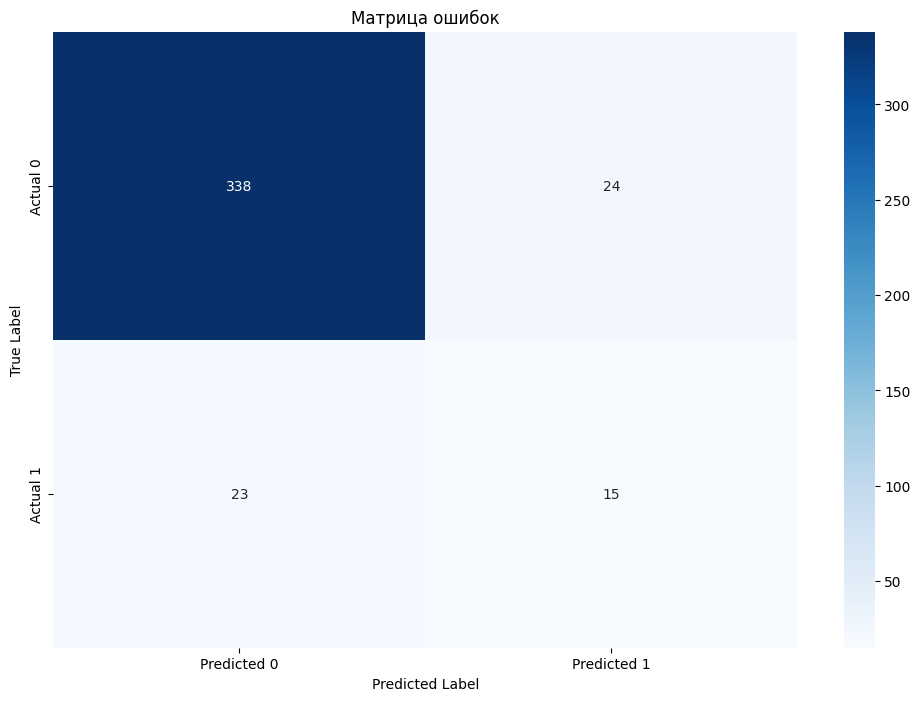

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем матрицу ошибок
conf_mat_svc = confusion_matrix(y_test, svc_preds)

# Отображаем матрицу ошибок с использованием seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Матрица ошибок')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем и обучаем RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе для RandomForestClassifier
RF_preds = rf.predict(X_test)

# Рассчитываем точность модели для RandomForestClassifier
accuracy_rf = accuracy_score(y_test, RF_preds)
print(f'RandomForestClassifier Accuracy: {accuracy_rf}')

RandomForestClassifier Accuracy: 1.0


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CatBoost Classifier
Cat = CatBoostClassifier(verbose=False)
Cat.fit(X_train, y_train)
cat_preds = Cat.predict(X_test)

# Рассчитываем точность модели для CatBoost Classifier
accuracy_cat = accuracy_score(y_test, cat_preds)
print(f'CatBoost Classifier Accuracy: {accuracy_cat}')

CatBoost Classifier Accuracy: 1.0


In [ ]:
# LGBM Classifier
LGBM = LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=4, min_child_weight=0.01, learning_rate=0.01, verbose=-1)
LGBM.fit(X_train, y_train)
LGBM_preds = LGBM.predict(X_test)

# Рассчитываем точность модели для LGBM Classifier
accuracy_lgbm = accuracy_score(y_test, LGBM_preds)
print(f'LGBM Classifier Accuracy: {accuracy_lgbm}')

LGBM Classifier Accuracy: 1.0


In [ ]:
# XGB Classifier
encoder = LabelEncoder()
new_y_train = encoder.fit_transform(y_train)
new_y_test = encoder.fit_transform(y_test)

xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, seed=10)
xgb_pred = xgb.fit(X_train, new_y_train).predict(X_test)

# Рассчитываем точность модели для XGB Classifier
accuracy_xgb = accuracy_score(new_y_test, xgb_pred)
print(f'XGB Classifier Accuracy: {accuracy_xgb}')

XGB Classifier Accuracy: 1.0


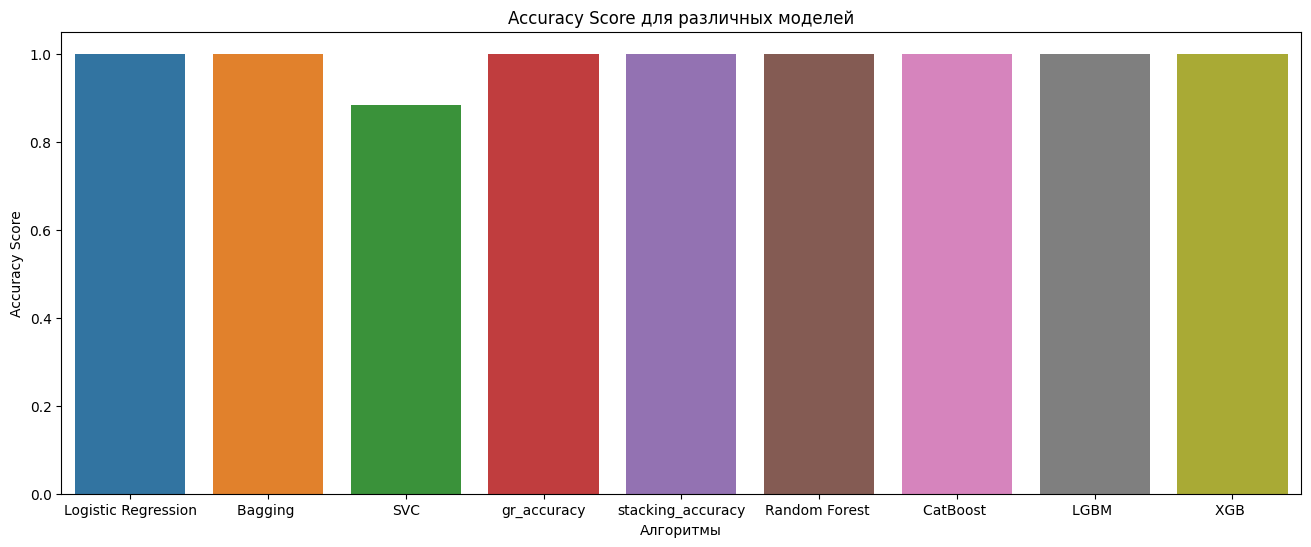

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Вычисляем accuracy_score для каждой модели
accuracy = accuracy_score(y_test, log_pred)
accuracy_bagging = accuracy_score(y_test, bagging_pred)
accuracy_svc = accuracy_score(y_test, svc_preds)
accuracy_rf = accuracy_score(y_test, RF_preds)
accuracy_cat = accuracy_score(y_test, cat_preds)
accuracy_lgbm = accuracy_score(y_test, LGBM_preds)
accuracy_xgb = accuracy_score(new_y_test, xgb_pred)
gr_accuracy = accuracy_score(y_test, gr_preds)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
#accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
#'Ensemble': accuracy_ensemble
# Создаем словарь с результатами
accuracy_dict = {
    'Logistic Regression': accuracy,
    'Bagging ': accuracy_bagging,
    'SVC': accuracy_svc,
    'gr_accuracy': gr_accuracy,
    'stacking_accuracy': stacking_accuracy,
    'Random Forest ': accuracy_rf,
    'CatBoost ': accuracy_cat,
    'LGBM ': accuracy_lgbm,
    'XGB ': accuracy_xgb

}

# Строим график
plt.figure(figsize=(16, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.xlabel('Алгоритмы')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score для различных моделей')
plt.show()

In [ ]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,is_top_ranked
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,1
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,1
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,1
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015,0
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015,0
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015,0
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015,0


### Теперь сделаю LinearRegression , где в качестве целевой переменной будет binary_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Создаем бинарную переменную на основе 'score'
df['binary_score'] = np.where(df['score'] > df['score'].median(), 1, 0)

# Выбираем параметры для классификации
X = df[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']]
# Удаление строк с пропущенными значениями
X = X.dropna()
y = df.loc[X.index, 'binary_score']  # Обновите y соответственно

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)


# Создаем и обучаем модель линейной регрессии
LinReg_Model = LinearRegression()
LinReg_Model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
lin_pred = LinReg_Model.predict(X_test)

# Рассчитываем MSE и R2
mse = mean_squared_error(y_test, lin_pred)
r2 = r2_score(y_test, lin_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error: 0.0773690572058691
R-squared (R2): 0.6870737593736177


In [ ]:
# Создаем и обучаем Bagging Classifier с Decision Tree
DecTree = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(DecTree, random_state=42)
bagging_model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
bagging_pred = bagging_model.predict(X_test)

# Рассчитываем точность модели
accuracy_bagging = accuracy_score(y_test, bagging_pred)
print(f'Bagging Classifier - Accuracy: {accuracy_bagging}')
# Рассчитываем MSE и R2
mse_bagging = mean_squared_error(y_test, bagging_pred)
r2_bagging = r2_score(y_test, bagging_pred)
print(f'Bagging Classifier - Mean Squared Error: {mse_bagging}')
print(f'Bagging Classifier - R-squared (R2): {r2_bagging}')

Bagging Classifier - Accuracy: 0.9575
Bagging Classifier - Mean Squared Error: 0.0425
Bagging Classifier - R-squared (R2): 0.8281048560378169


In [ ]:
# Создаем и обучаем SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе для SVC
svc_preds = svc.predict(X_test)

# Рассчитываем точность модели для SVC
accuracy_svc = accuracy_score(y_test, svc_preds)
print(f'SVC Accuracy: {accuracy_svc}')
# Рассчитываем MSE и R2
mse_svc = mean_squared_error(y_test, svc_preds)
r2_svc = r2_score(y_test, svc_preds)
print(f'SVC - Mean Squared Error: {mse_svc}')
print(f'SVC - R-squared (R2): {r2_svc}')

SVC Accuracy: 0.14
SVC - Mean Squared Error: 0.86
SVC - R-squared (R2): -2.478348795470058


In [ ]:
# Создаем и обучаем RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе для RandomForestClassifier
RF_preds = rf.predict(X_test)

# Рассчитываем точность модели для RandomForestClassifier
accuracy_rf = accuracy_score(y_test, RF_preds)
print(f'RandomForestClassifier Accuracy: {accuracy_rf}')
# Рассчитываем MSE и R2
mse_rf = mean_squared_error(y_test, RF_preds)
r2_rf = r2_score(y_test, RF_preds)
print(f'RandomForestClassifier - Mean Squared Error: {mse_rf}')
print(f'RandomForestClassifier - R-squared (R2): {r2_rf}')

RandomForestClassifier Accuracy: 0.9725
RandomForestClassifier - Mean Squared Error: 0.0275
RandomForestClassifier - R-squared (R2): 0.8887737303774109


In [ ]:
# CatBoost Classifier
Cat = CatBoostClassifier(verbose=False)
Cat.fit(X_train, y_train)
cat_preds = Cat.predict(X_test)

# Рассчитываем точность модели для CatBoost Classifier
accuracy_cat = accuracy_score(y_test, cat_preds)
print(f'CatBoost Classifier Accuracy: {accuracy_cat}')
# Рассчитываем MSE и R2
mse_cat = mean_squared_error(y_test, cat_preds)
r2_cat = r2_score(y_test, cat_preds)
print(f'CatBoost Classifier - Mean Squared Error: {mse_cat}')
print(f'CatBoost Classifier - R-squared (R2): {r2_cat}')

CatBoost Classifier Accuracy: 0.9825
CatBoost Classifier - Mean Squared Error: 0.0175
CatBoost Classifier - R-squared (R2): 0.929219646603807


In [ ]:
# LGBM Classifier
LGBM = LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=4, min_child_weight=0.01, learning_rate=0.01, verbose=-1)
LGBM.fit(X_train, y_train)
LGBM_preds = LGBM.predict(X_test)

# Рассчитываем точность модели для LGBM Classifier
accuracy_lgbm = accuracy_score(y_test, LGBM_preds)
print(f'LGBM Classifier Accuracy: {accuracy_lgbm}')
# Рассчитываем MSE и R2
mse_lgbm = mean_squared_error(y_test, LGBM_preds)
r2_lgbm = r2_score(y_test, LGBM_preds)
print(f'LGBM Classifier - Mean Squared Error: {mse_lgbm}')
print(f'LGBM Classifier - R-squared (R2): {r2_lgbm}')

LGBM Classifier Accuracy: 0.9475
LGBM Classifier - Mean Squared Error: 0.0525
LGBM Classifier - R-squared (R2): 0.7876589398114209


In [ ]:
# XGB Classifier
encoder = LabelEncoder()
new_y_train = encoder.fit_transform(y_train)
new_y_test = encoder.fit_transform(y_test)

xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, seed=10)
xgb_pred = xgb.fit(X_train, new_y_train).predict(X_test)

# Рассчитываем точность модели для XGB Classifier
accuracy_xgb = accuracy_score(new_y_test, xgb_pred)
print(f'XGB Classifier Accuracy: {accuracy_xgb}')
# Рассчитываем точность модели для XGB Classifier
mse_xgb = mean_squared_error(new_y_test, xgb_pred)
r2_xgb = r2_score(new_y_test, xgb_pred)
print(f'XGB Classifier MSE: {mse_xgb}')
print(f'XGB Classifier R-squared (R2): {r2_xgb}')

XGB Classifier Accuracy: 0.97
XGB Classifier MSE: 0.03
XGB Classifier R-squared (R2): 0.878662251320812


In [ ]:
# RandomForestClassifier
m1 = RandomForestClassifier()

# SVM with linear kernel
m2 = SVC(kernel='linear')

# Список моделей для ансамбля
estimators = [('RandomForest', m1), ('SVM', m2)]

# Создание ансамбля
ensemble = VotingClassifier(estimators)
ensemble_model = ensemble.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)

# Рассчитываем точность модели для ансамбля
accuracy_ensemble = accuracy_score(y_test, ensemble_pred)
print(f'Ensemble Accuracy: {accuracy_ensemble}')
# Рассчитываем точность модели для ансамбля
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
r2_ensemble = r2_score(y_test, ensemble_pred)
print(f'Ensemble MSE: {mse_ensemble}')
print(f'Ensemble R-squared (R2): {r2_ensemble}')

Ensemble Accuracy: 0.9575
Ensemble MSE: 0.0425
Ensemble R-squared (R2): 0.8281048560378169


In [ ]:
# Многоуровневый стекинг (С логистической регрессией на выходе)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=300, max_depth=12, num_leaves=6, verbose=-1)),
    ('adaboost', AdaBoostClassifier(n_estimators=300))
]

clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=10
)

# Train Stacking Classifier
clf.fit(X_train, y_train)

# Predictions and evaluation for stacking classifier
stacking_pred = clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Classifier Accuracy: {stacking_accuracy}')
mse_ensemble = mean_squared_error(y_test, stacking_pred)
r2_ensemble = r2_score(y_test, stacking_pred)

print(f'Ensemble MSE: {mse_ensemble}')
print(f'Ensemble R-squared (R2): {r2_ensemble}')

Stacking Classifier Accuracy: 0.9725
Ensemble MSE: 0.0275
Ensemble R-squared (R2): 0.8887737303774109


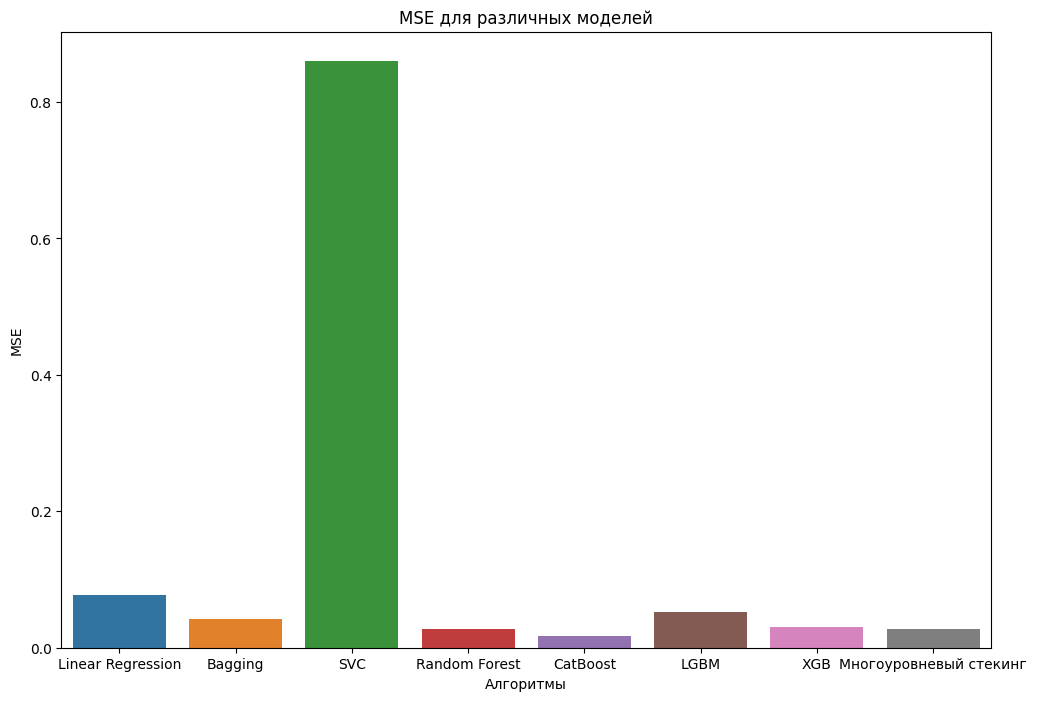

In [ ]:
# Вычисляем MSE для каждой модели
mse_dict = {
    'Linear Regression': mse,
    'Bagging': mse_bagging,
    'SVC': mse_svc,
    'Random Forest': mse_rf,
    'CatBoost': mse_cat,
    'LGBM': mse_lgbm,
    'XGB': mse_xgb,
    'Многоуровневый стекинг': mse_ensemble
}

# Строим график MSE
plt.figure(figsize=(12, 8))
sns.barplot(x=list(mse_dict.keys()), y=list(mse_dict.values()))
plt.xlabel('Алгоритмы')
plt.ylabel('MSE')
plt.title('MSE для различных моделей')
plt.show()
